# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
label_names = iris.target_names

print("Shape", X.shape)
print("feature name: ", feature_names)
print("label name: ", label_names)

Shape (150, 4)
feature name:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
label name:  ['setosa' 'versicolor' 'virginica']


載入 相關套件 並 執行 hierarchical clustering 實驗 ...

### Check Full Dendrogram

In [9]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

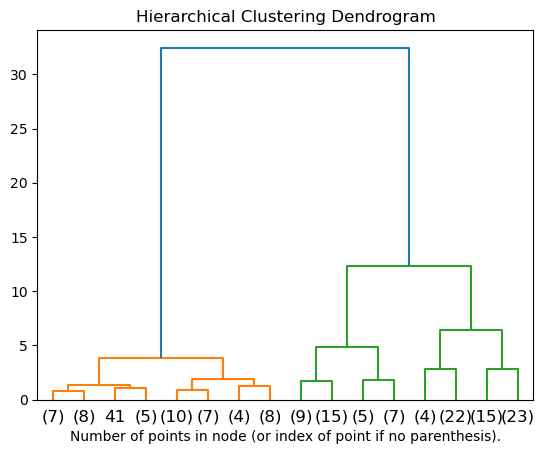

In [12]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(X)
y_pred = model.labels_
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Different Linkage Measurement

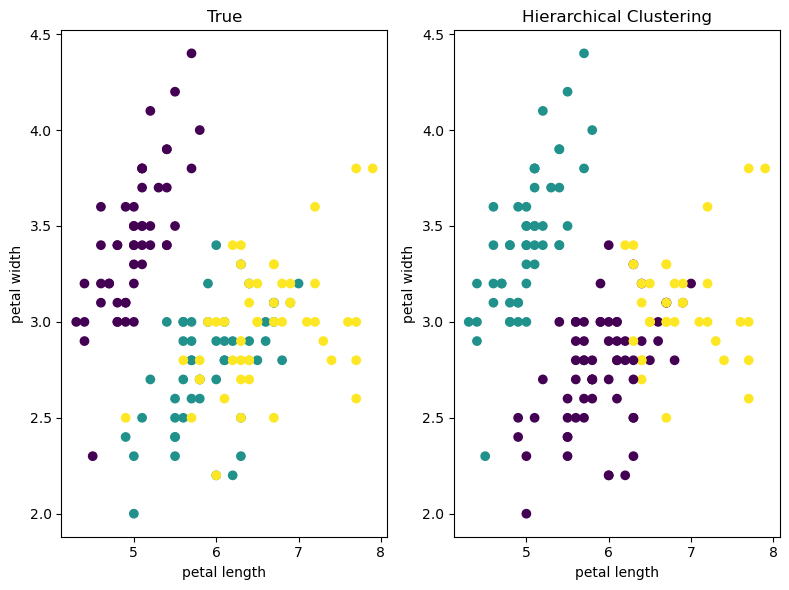

In [16]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X)
y_pred = model.labels_

plt.figure(figsize=(8, 6)) 
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("True")
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1],c=y_pred)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("Hierarchical Clustering")
plt.tight_layout()

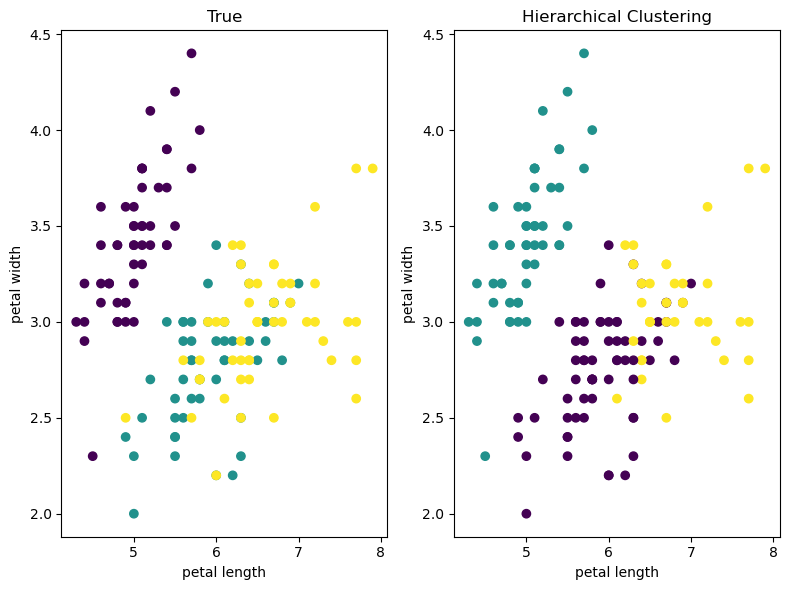

In [19]:
model = AgglomerativeClustering(n_clusters=3, linkage='average')
model.fit(X)
y_pred = model.labels_

plt.figure(figsize=(8, 6)) 
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("True")
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1],c=y_pred)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("Hierarchical Clustering")
plt.tight_layout()

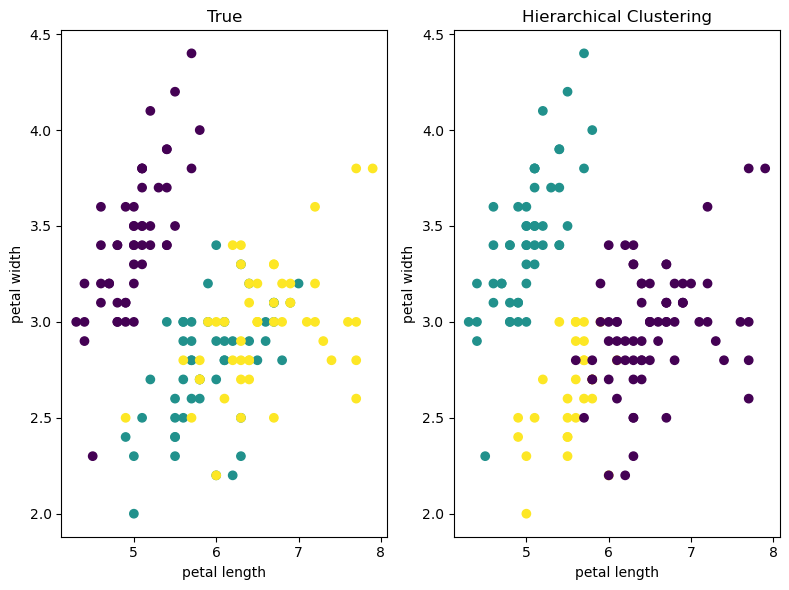

In [20]:
model = AgglomerativeClustering(n_clusters=3, linkage='complete')
model.fit(X)
y_pred = model.labels_

plt.figure(figsize=(8, 6)) 
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("True")
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1],c=y_pred)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("Hierarchical Clustering")
plt.tight_layout()